<a href="https://colab.research.google.com/github/vibhutir/Melanoma-Detection-with-Domain-Specific-Artifact-Debiasing-and-Augmentation/blob/main/Ruler_Masks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ISIC_2186123.png


True

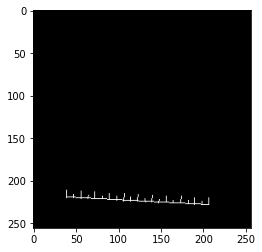

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

final_mask = np.zeros((256,256,3))

mask_path = '/content/masks'
for img_path in os.listdir(mask_path):
  name = img_path.split('_')[0]+'_'+img_path.split('_')[1]+'.png'
  img_path = 'masks/'+img_path
  img = np.array(cv2.imread(img_path))
  final_mask += img

print(name)
plt.imshow(final_mask)

#cv2.imwrite(name,final_mask)

Making the NP array with all masks

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Extracting MM mask from image
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


drive/MyDrive/EECS 545/ruler_masks/ISIC_0012374_downsampled.png
drive/MyDrive/EECS 545/ruler_masks/ISIC_0076545.png
drive/MyDrive/EECS 545/ruler_masks/ISIC_0012386_downsampled.png
drive/MyDrive/EECS 545/ruler_masks/ISIC_0012413_downsampled.png
drive/MyDrive/EECS 545/ruler_masks/ISIC_0031105.png
drive/MyDrive/EECS 545/ruler_masks/ISIC_0031118.png
drive/MyDrive/EECS 545/ruler_masks/ISIC_0031131.png
drive/MyDrive/EECS 545/ruler_masks/ISIC_0031132.png
drive/MyDrive/EECS 545/ruler_masks/ISIC_0031145.png
drive/MyDrive/EECS 545/ruler_masks/ISIC_0031189.png
drive/MyDrive/EECS 545/ruler_masks/ISIC_0074542.png
drive/MyDrive/EECS 545/ruler_masks/ISIC_0846205.png
drive/MyDrive/EECS 545/ruler_masks/ISIC_0868656.png
drive/MyDrive/EECS 545/ruler_masks/ISIC_2186123.png
drive/MyDrive/EECS 545/ruler_masks/.ipynb_checkpoints


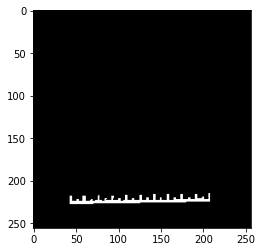

In [ ]:
base_path = 'drive/MyDrive/EECS 545/ruler_masks'

ruler_masks = np.empty((15,256,256,3))

for index, img_path in enumerate(os.listdir(base_path)):
  img_path = os.path.join(base_path,img_path)
  print(img_path)

  #img_path = 'masks/'+img_path
  mask = np.array(cv2.imread(img_path))
  ruler_masks[index] = mask


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


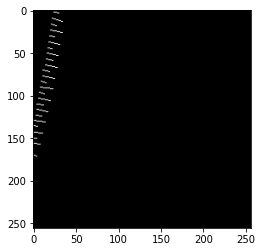

In [ ]:
plt.imshow(ruler_masks[5])

In [ ]:
np.save('ruler_array.npy', ruler_masks)

In [ ]:
from PIL import Image 
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Extracting MM mask from image
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
base_path = 'drive/MyDrive/EECS 545/ruler_masks'

In [ ]:
import pickle
import numpy as np

# open a file, where you stored the pickled data
file = open('/content/log_Test4202206_roc_plt_lst.pkl', 'rb')

# dump information to that file
roc_plt_lst = pickle.load(file)

# close the file
file.close()

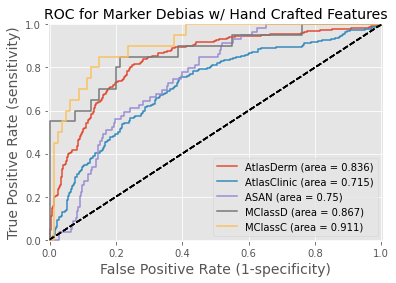

In [ ]:
import matplotlib.pyplot as plt

test_names = ['AtlasDerm', 'AtlasClinic', 'ASAN', 'MClassD', 'MClassC']

fig = plt.figure()
plt.style.use('ggplot')
plt.use_sticky_edges = False
plt.margins(0.005)
for index, thruple in enumerate(roc_plt_lst):
    fpr, tpr, a_u_c, _, _ = thruple
    plt.plot(fpr, tpr, label=f'{test_names[index]} (area = {round(a_u_c, 3)})')
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions line
    plt.xlabel('False Positive Rate (1-specificity)', fontsize=14)
    plt.ylabel('True Positive Rate (sensitivity)', fontsize=14)
    plt.title(f'ROC for Marker Debias w/ Hand Crafted Features', fontsize=14)
    plt.legend(loc="lower right")
    plt.rc('legend', fontsize=10)  # legend fontsize
plt.show()